# Kaggle Titanic competition

Written on 25.07.2022

This file contains data loading, preprocessing and feature engineering steps on Kaggle's Titanic- competition. Rest of the steps are going to be in a different workbook.

In [1]:
## Load libraries needed
import pandas as pd
import numpy as np
from numpy.random import randint

In [2]:
## Load datasets
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [3]:
## Inspect the train dataset to get a view of what kind of data I am dealing with

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Stats on the training dataset

## Inspect 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
## Fix the one missing value in Fare, rest can be done same time wiht the fixes to training dataframe
test_df.Fare.fillna(32, inplace=True)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

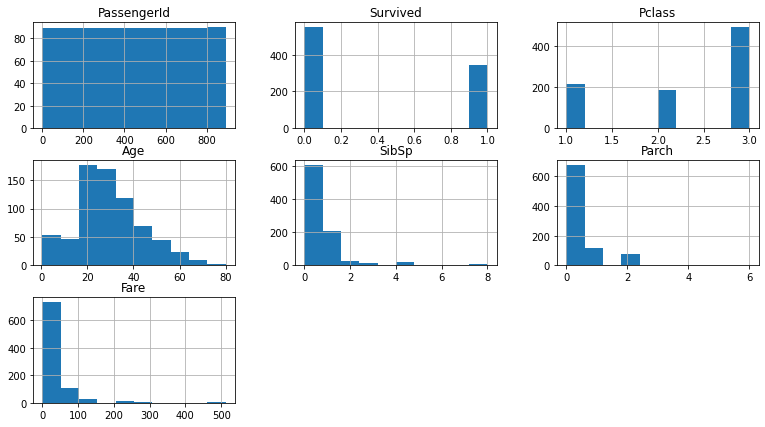

In [9]:
train_df.hist(figsize=(13,7))

In [10]:
train_df[train_df["Pclass"] == 3].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [11]:
train_df[train_df["Pclass"] == 2].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [12]:
train_df[train_df["Pclass"] == 1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [13]:
## Extract all the surenames to better see relations between passengers.

train_df["Title"] = train_df.Name.map(lambda x: x.split(" ")[1][:-1].strip())
test_df["Title"] = test_df.Name.map(lambda x: x.split(" ")[1][:-1].strip())

In [14]:
train_df.Title.value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
                 4
Planke           3
Impe             3
Gordon           2
Col              2
Mlle             2
Major            2
Melkebeke        1
Jonkheer         1
Shawah           1
th               1
Velde            1
Capt             1
Messemaeker      1
Carlo            1
Ms               1
Mme              1
Steen            1
Mulder           1
Pelsmaeker       1
Walle            1
de               1
Billiard         1
Don              1
Cruyssen         1
Name: Title, dtype: int64

In [15]:
def clean_titles(title, sex):
    if str(title) not in ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col", "Major", "Jonkheer"]:
        print(title)
        if str(sex) == "male":
            return 1
        else:
            return 2
    else:
        if title == "Mr":
            return 1
        if title == "Miss":
            return 2
        if title == "Mrs":
            return 3
        if title == "Master":
            return 4
        if title == "Dr":
            return 5
        if title == "Rev":
            return 6
        if title == "Col":
            return 7
        if title == "Major":
            return 8
        if title == "Jonkheer":
            return 9

In [16]:
train_df.Title = train_df.apply(lambda x: clean_titles(x.Title, x.Sex), axis=1)
test_df.Title = test_df.apply(lambda x: clean_titles(x.Title, x.Sex), axis=1)

Planke
Don
Planke
Billiard
de
Walle
Pelsmaeker
Mulder

Planke
Steen
Carlo
Mme
Impe
Ms


Gordon
Messemaeker
Impe
Gordon
Mlle
Mlle
Capt
Velde
th
Shawah
Impe

Melkebeke
Cruyssen
Carlo
Khalil

Ms
Palmquist
Planke
Billiard

Messemaeker
Brito
Billiard




In [17]:
def fill_decks(pclass, fare, cab):
    cab = str(cab)
    if cab == "nan":
        if pclass == 3:
            if fare <= 7.75:
                return 7
            if fare <= 8.05 and fare > 7.75:
                return 6
            if fare > 8.05 and fare <= 15.5:
                return 5
            else:
                return 4
        if pclass == 2:
            if fare <= 13:
                return 7
            if fare > 13 and fare <= 14.25:
                return 6
            if fare > 14.25 and fare <= 26:
                return 5
            else:
                return 4
        if pclass == 1:
            if fare <= 30.93:
                return 5
            if fare > 30.93  and fare <= 60.3:
                return 4
            if fare > 60.3 and fare <= 93.5:
                return 3
            else:
                return 2
    else:
        if cab[0] == "A":
            return 1
        if cab[0] == "B":
            return 2
        if cab[0] == "C":
            return 3
        if cab[0] == "D":
            return 4
        if cab[0] == "E":
            return 5
        if cab[0] == "F":
            return 6
        if cab[0] == "G":
            return 7

In [18]:
train_df["Deck"] = train_df.apply(lambda x: fill_decks(x.Pclass, x.Fare, x.Cabin), axis=1)
test_df["Deck"] = test_df.apply(lambda x: fill_decks(x.Pclass, x.Fare, x.Cabin), axis=1)

In [19]:
def age_groups(age):
    if age <= 16:
        return 3
    if age <= 44 and age > 16:
        return 2
    else:
        return 1

In [20]:
def port(emb):
    if emb == "S":
        return 1
    if emb == "C":
        return 2
    else:
        return 3

In [21]:
train_df["AgeGroup"] = train_df.Age.map(lambda x: age_groups(x))
test_df["AgeGroup"] = test_df.Age.map(lambda x: age_groups(x))

In [22]:
train_df["Embarked"] = train_df.Embarked.map(lambda x: port(x))
test_df["Embarked"] = test_df.Embarked.map(lambda x: port(x))

In [23]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Deck,AgeGroup
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,890.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.365881,1.725028,5.014607,1.784512
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.640157,1.093203,1.564802,0.627664
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000,4.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,5.000000,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,6.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,9.000000,7.000000,3.000000


In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,1,7.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,3,3.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,6.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,3,3.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1,6.0,2


In [25]:
train_df.Embarked.fillna("S", inplace=True)
test_df.Embarked.fillna("S", inplace=True)

In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Deck,AgeGroup
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,890.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.365881,1.725028,5.014607,1.784512
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.640157,1.093203,1.564802,0.627664
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000,4.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,5.000000,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,6.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,9.000000,7.000000,3.000000


In [27]:
train_df.groupby(by="Title").Age.aggregate(func="mean")

Title
1    32.522444
2    22.269231
3    36.182692
4     4.574167
5    42.000000
6    43.166667
7    58.000000
8    48.500000
9    38.000000
Name: Age, dtype: float64

In [28]:
def fix_age(age, title):
    age = str(age)
    if age == "nan":
        if title == 1:
            return 32.5
        if title == 2:
            return 22.3
        if title == 3:
            return 36.2
        if title == 4:
            return 4.6
        if title == 5:
            return 42
        if title == 6:
            return 43.2
        if title == 7:
            return 58
        if title == 8:
            return 48
        if title == 9:
            return 38
    else:
        return age

In [29]:
train_df.Age = train_df.apply(lambda x: fix_age(x.Age, x.Title), axis=1)
test_df.Age = test_df.apply(lambda x: fix_age(x.Age, x.Title), axis=1)

In [30]:
train_df.Sex = train_df.Sex.map(lambda x: 1 if x == "male" else 0)
test_df.Sex = test_df.Sex.map(lambda x: 1 if x == "male" else 0)

In [31]:
train_df.drop(labels="Cabin", inplace=True, axis=1)

In [32]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           1
AgeGroup       0
dtype: int64

In [33]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
AgeGroup         0
dtype: int64

In [34]:
train_df.dropna(inplace=True)

In [35]:
x_train = train_df[["Pclass", "Sex", "Age","SibSp","Parch", "Deck", "Title", "AgeGroup", "Embarked"]]
y_train = train_df.Survived
x_test = test_df[["Pclass", "Sex", "Age","SibSp","Parch",  "Deck", "Title", "AgeGroup", "Embarked"]]
x_test_ids = test_df.PassengerId

x_train.shape[0]

890

In [36]:
x_test_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## End of preprocessing

In the sections above, I dealt with the NaN values, as well as did some feature engineering for the dataframe. In the end, I dropped columns that were not deemed necessary for the analysis, such as PassengerId and Name.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import laplacian_kernel, sigmoid_kernel, chi2_kernel 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
comp = 200

In [39]:
n_feat = Nystroem(kernel = "laplacian", random_state=12, n_components=comp)
x_feat_train = n_feat.fit_transform(x_train)
x_feat_test = n_feat.transform(x_test)
scal = StandardScaler()
xtrain_st = scal.fit_transform(x_feat_train)
xtest_st = scal.transform(x_feat_test)
len(xtest_st[1])

200

In [40]:

db = DBSCAN(eps=0.9, min_samples=4)
clust_train = db.fit_predict(xtrain_st, y_train)
clust_train = (clust_train - clust_train.mean()) / clust_train.std()
xtr_c_included = np.insert(xtrain_st, obj=comp, values=clust_train, axis=1)

In [41]:
clust_test = db.fit_predict(xtest_st)

In [42]:
clust_test = (clust_test - clust_test.mean()) / clust_test.std()

In [43]:
xte_c_included = np.insert(xtest_st, obj=comp, values=clust_test, axis=1)
len(xte_c_included[1])

201

In [44]:
clf = SGDClassifier(loss="modified_huber", random_state=12, penalty="elasticnet", l1_ratio=0.4, learning_rate="adaptive", eta0=0.00395, power_t=1, warm_start=True)
clf.fit(xtr_c_included, y_train)
clf.score(xtr_c_included, y_train)

0.8943820224719101

In [45]:
score_1 = cross_val_score(clf, xtr_c_included, y_train).mean()
print("Score for CLF: {}".format(score_1))

Score for CLF: 0.7887640449438202


In [146]:
RFC = RandomForestClassifier( n_estimators=100,    #default=100
                                max_depth=15,         #default=None, best 15
                                min_samples_split=20, #default=2,
                                min_samples_leaf=7,  #default=1, best 7
                                bootstrap=True,      #default=True
                                ccp_alpha=0.0,       #default=0.0
                                random_state=None,
                                warm_start=False)

In [147]:
RFC.fit(xtr_c_included, y_train)
RFC.score(xtr_c_included, y_train)

0.9157303370786517

In [148]:
score_2 = cross_val_score(RFC, xtr_c_included, y_train).mean()
print("Score for RFC: {}".format(score_2))

Score for RFC: 0.844943820224719


In [149]:
res_1 = RFC.predict(xte_c_included)

In [150]:
res_2 = clf.predict(xte_c_included)

In [151]:
if score_1 > score_2:
    res = res_2
else:
    res = res_1
result = pd.DataFrame(x_test_ids, columns=["PassengerId"])
result["Survived"] = res

In [152]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [153]:
result.to_csv("predictions.csv")